# NLP Text Classification For  Climate Change Belief Analysis
## Predict an individual's belief in climate change based on historical tweet data.

# Problem Statement
##### We are given a task to predict based on peoples opinions on climate change whether or not they believe if it is real or not. This would add value to companies market research efforts in estimating how their product or services may be received.
##### We are required to use one of the machine learning models 'Classification' to classify whether or not a prson believes in climate change based on the data collected on tweeter.

# Solution
#### In solving this problem, we will have to use NLP and machine learning. The first thing we will do is to import all required libraries. We will import data and then perform exploratory data analysis(EDA). We will perform text pre-processing to convert data or text into numerical information to implement machine learning algorithms. Finally, Machine Learning algorithms and test our sentiment analysis and then do comparison between these algorithms. Then we will tell which one provides accurate results based on F1-Score.


In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="Is5Lmy1JAwUtCHsaeDVOUoIdX",
    project_name="undefined",
    workspace="thandazani",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\Thandazani\\Downloads' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/thandazani/undefined/cdb0fd85cc324502a9d9da0e83d29ee0



In [2]:
import re  #regular expression
import nltk  # text manipulation

import string
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning/Machine Learning Project 2/Advanced_Classification_Predict-student_data-2780/train.csv")
test =pd.read_csv("C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning\Machine Learning Project 2/Advanced_Classification_Predict-student_data-2780/test_with_no_labels.csv")

In [4]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


### Data Inspection and Cleaning
Text is a highly unstractured form of data, various of noise are present in it and the data is not readly analyzable without pre-processing. The process of cleaning and standardization of text, making it noise free and ready for analysis is known as text pre-processing. we will Inspect and clean the Data

In [5]:
df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [6]:
df.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

In [7]:
df_cpy = df.copy()

There are so many words and characters which are not important or required. So we will try to keep only those words which are important.

#### Checking dimension of train dataset

In [8]:
df_cpy.shape

(15819, 3)

In [9]:
df_cpy['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In this data we have 8530 tweets labeled as positive, 3640 tweets labeled as highly positive, 2353 tweets labeled as neutral and 1296 labeled as negative tweets

#### We will now check the distribution of length of the tweets

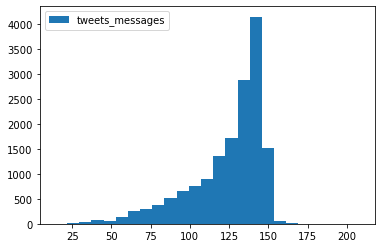

In [10]:
length_data = df_cpy['message'].str.len()

plt.hist(length_data, bins=25, label="tweets_messages")

plt.legend()
plt.show()

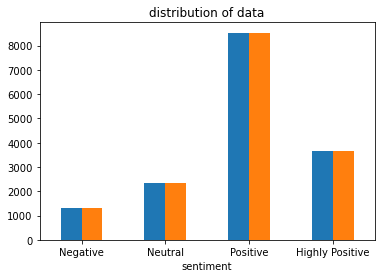

In [11]:
# plotting the distribution for dataset

ax = df_cpy.groupby('sentiment').count().plot(kind='bar', title='distribution of data', legend=False)
ax.set_xticklabels(['Negative','Neutral', 'Positive','Highly Positive'], rotation=0)

text, sentiment = list(df_cpy['message']), list(df_cpy['sentiment'])

by exploring the dataset we can tell that the dataset cointains few data for negative and neutral labels and higher distribution for positive and highly positive.


droping tweetid column

In [12]:
df_cpy.drop('tweetid', axis='columns', inplace=True)

Now we will do an important step of cleaning data, removing unwanted words, characters. This will help us obtain better results.
We are remove unwanted text patterns from the tweets

## Pre-processing

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

### Removing Twitter Handles (@User)

In [14]:
df_cpy['text'] = np.vectorize(remove_pattern)(df_cpy['message'], "@[\w]*")

df_cpy['text'] = df_cpy['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df_cpy.head()

,sentiment,message,text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable","PolySciMajor chief doesn't think carbon dioxide main cause global warming and.. wait, what!? https://t.co/yeLvcEFXkC"
1,1,It's not like we lack evidence of anthropogenic global warming,It's like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,Researchers have three years climate change before it’s late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#TodayinMaker# WIRED 2016 pivotal year climate change https://t.co/44wOTxTLcD
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight","It's 2016, racist, sexist, climate change denying bigot leading polls. #ElectionNight"


In [15]:
toke_message = df_cpy['text'].apply(lambda x: x.split())
toke_message.head()

0    [PolySciMajor, chief, doesn't, think, carbon, dioxide, main, cause, global, warming, and.., wait,, what!?, https://t.co/yeLvcEFXkC]
1                                                                           [It's, like, lack, evidence, anthropogenic, global, warming]
2                  [Researchers, have, three, years, climate, change, before, it’s, late, https://t.co/WdT0KdUr2f, https://t.co/Z0ANPT…]
3                                                 [#TodayinMaker#, WIRED, 2016, pivotal, year, climate, change, https://t.co/44wOTxTLcD]
4                                      [It's, 2016,, racist,, sexist,, climate, change, denying, bigot, leading, polls., #ElectionNight]
Name: text, dtype: object

#### We Normilise tokenized tweets.

In [16]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

toke_message = toke_message.apply(lambda x: [stemmer.stem(i) for i in x])

#### Now we will combine these tokens back together.

In [17]:
for i in range(len(toke_message)):
    toke_message[i] = ' '.join(toke_message[i])
df_cpy['text']= toke_message

#### removing noise 

In [18]:
df_cpy['text'] = df_cpy['text'].str.replace("[^a-zA-Z#]"," ")
df_cpy.head()

,sentiment,message,text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",polyscimajor chief doesn t think carbon dioxid main caus global warm and wait what https t co yelvcefxkc
1,1,It's not like we lack evidence of anthropogenic global warming,it like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,research have three year climat chang befor it late https t co wdt kdur f https t co z anpt
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#todayinmaker# wire pivot year climat chang https t co wotxtlcd
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",it racist sexist climat chang deni bigot lead polls #electionnight


### Visualizing Words from tweets

### We will Explore and Visualize data with the cleaned data
#### We want to explore common words in these trend tweets for negative, neutral, positive, and highly positive tweets. 

Understanding Common Words used in The dataset : WordCloud

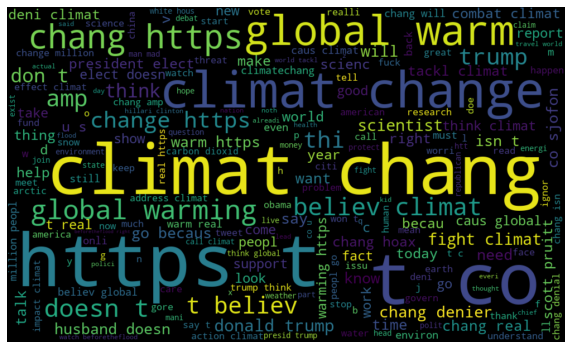

In [19]:
tweets_words = ' '.join([text for text in df_cpy['text']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=130).generate(tweets_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

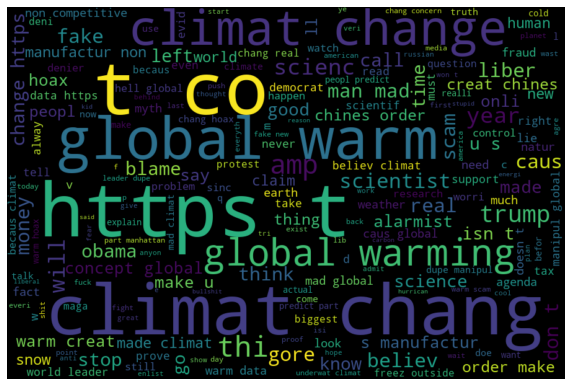

In [20]:
negative_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment']== -1]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the words here are negative such as: 
# doesn't believe , Fight climate change

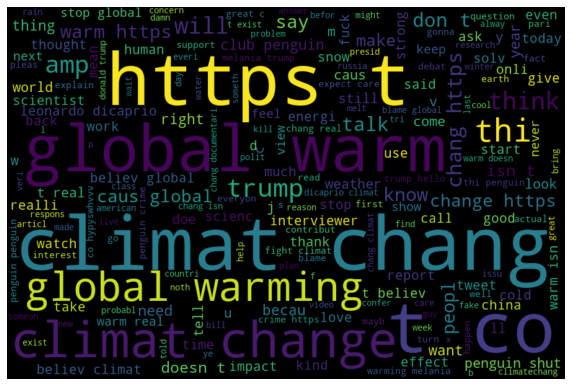

In [21]:
neutral_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment'] == 0]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the words here are neutral such as: 
# doesn't impact

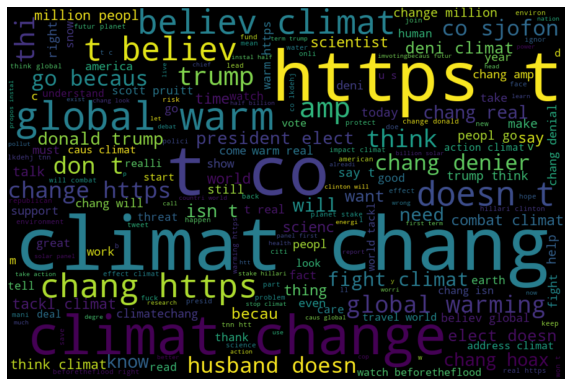

In [22]:
positive_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment'] == 1]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

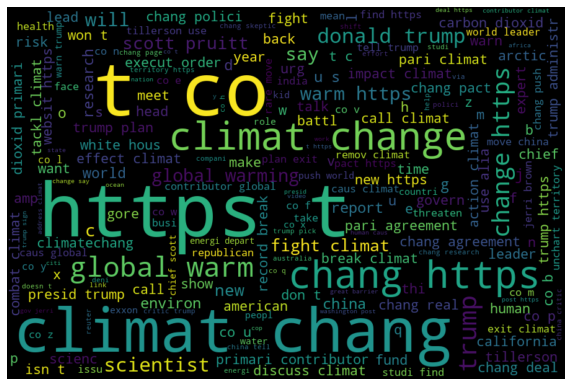

In [23]:
extra_positive_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment'] == 2]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(extra_positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Before we analyze a pre-processed data, we need to convert it into features:

TF-IDF

Word Embeddings

Word2Vec

Before we analyze preprocessed data, we have to convert it into features first.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [25]:
bow_vectorizer = CountVectorizer(min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df_cpy['text'])

bow.shape

(15819, 6811)

### We have completed the pre-modeling stage. Now we want to build models on the dataset with different sets prepared ealier on sections: Bag Of Words, TF-IDf, vectors. we will use these algorithms:

Logistic Regression
Support Vector Machine
Random Forest
Naive Bayes
XGBoost

Evaluation Metrics:

We will use F1_Score in the evaluation of metric

True Positive(TP) - correctly predicted positive values, means the values of actual class is yes and the value of predicted is also yes.

True Negative(TN) - correctly predicted negative values, means the values of actual class is no and the value predicted is also no.

False positive(FP) - When the actual class is no and predicted class is yes.

False Negative(FN) - When actual class is yes but predicted class is no.

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2 (Recall Precision)/(Recall+Precision)

Logistc Regression

In [26]:
X = df_cpy['message']
y = df_cpy['sentiment']

In [27]:
vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X)
X.shape

(15819, 33271)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0125, random_state=48)

In [29]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_prediction = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_prediction)

print("Training accuracy Score    : ",lr.score(X_train,y_train))
print("Testing accuracy Score : ",lr_accuracy )
print(classification_report(lr_prediction,y_test))

Training accuracy Score    :  0.864349273413994
Testing accuracy Score :  0.7727272727272727
              precision    recall  f1-score   support

          -1       0.31      0.67      0.42         6
           0       0.45      0.71      0.55        24
           1       0.92      0.79      0.85       136
           2       0.83      0.75      0.79        32

    accuracy                           0.77       198
   macro avg       0.62      0.73      0.65       198
weighted avg       0.83      0.77      0.79       198



In [30]:
NB = MultinomialNB()

NB.fit(X_train,y_train)

NB_prediction = NB.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)

print("training accuracy Score: ", NB.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.7396453492093976
Testing accuracy Score :  0.696969696969697
              precision    recall  f1-score   support

          -1       0.08      1.00      0.14         1
           0       0.11      1.00      0.19         4
           1       0.97      0.67      0.79       172
           2       0.62      0.86      0.72        21

    accuracy                           0.70       198
   macro avg       0.44      0.88      0.46       198
weighted avg       0.91      0.70      0.77       198



In [31]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

rf_prediction = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9987196722360925
Testing accuracy Score :  0.7626262626262627
              precision    recall  f1-score   support

          -1       0.23      1.00      0.38         3
           0       0.47      0.86      0.61        21
           1       0.95      0.75      0.84       149
           2       0.62      0.72      0.67        25

    accuracy                           0.76       198
   macro avg       0.57      0.83      0.62       198
weighted avg       0.85      0.76      0.79       198



In [32]:
test1 = test['message']
X_test =vector.transform(test1)

test_pred = lr.predict(X_test)

test['sentiment'] = test_pred

subm_final = test[['tweetid','sentiment']]
subm_final.to_csv('C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning/subm_final.csv', index=False)

In [33]:
subm_final

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,0
10544,867455,0


In [34]:
test1 = test['message']
X_test =vector.transform(test1)

test_pred = rf.predict(X_test)

test['sentiment'] = test_pred

subm = test[['tweetid','sentiment']]
subm.to_csv('C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning/subm.csv', index=False)

In [35]:
subm

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0


In [36]:
test1 = test['message']
X_test =vector.transform(test1)

test_pred =NB.predict(X_test)

test['sentiment'] = test_pred

subm = test[['tweetid','sentiment']]
subm.to_csv('C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning/subm2.csv', index=False)

In [37]:
subm

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0


In [38]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/thandazani/undefined/cdb0fd85cc324502a9d9da0e83d29ee0
COMET INFO:   Parameters:
COMET INFO:     alpha                    : 1.0
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_prior              : 1
COMET INFO:     class_weight             : 1
COMET INFO:     criterion                : gini
COMET INFO:     fit_prior                : True
COMET INFO:     max_depth                : 1
COMET INFO:     max_features             : auto
COMET INFO:     max_leaf_nodes           : 1
COMET INFO:     max_samples              : 1
COMET INFO:     min_impurity_decrease    : 0.0
COMET INFO:     min_impurity_split       : 1
COMET INFO:     min_samples_leaf         : 1
COMET INFO:     min_samples_s